<center>
<h1>
CREDIT CARD SPENT PREDICTION USING REGRESSION   
</h1>
</center>

Steps for Regression Modeling:
1. Business problem definition - Company collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card).Priotize the drivers based on the importance. 
2. convert business problem into statistical problem  Total_spent = F(address, hourstv, ownipod, region, voice, spousedcat info etc.)
3. Finding the right technique -OLS
4. Data colletion(Y, X) 
5. Consolidate the data - aggregate and consolidate the data at customer level
6. Data preparation for modeling (create data audit report)
    a. missing value treatment
    b. outlier treatment
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of correlation matrics, VIF)
10. Create dev and validation data sets
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data  set (check the stability of model, scoring, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)






In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=12,10
plt.rcParams['axes.grid']= True
plt.rcParams["patch.force_edgecolor"] = True
plt.gray()
%matplotlib inline

In [107]:
d_dic=pd.read_excel('CREDIT CARD USERS DATA.xlsx',sheet_name=None)

In [108]:
d_dic.keys()

odict_keys(['customer_dbase', 'Data Dictionary', 'Business Problem'])

In [109]:
#Business Problem Description
print(d_dic['Business Problem']['Unnamed: 1'][1])
print(d_dic['Business Problem']['Unnamed: 1'][2])

Company collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card)
Priotize the drivers based on the importance. 


In [110]:
#Data Description
d_dic['Data Dictionary'][['Numeric Variable','Label']].iloc[0:132,:].head()

,Numeric Variable,Label
0,custid,Customer ID
1,region,Geographic indicator
2,townsize,Size of hometown
3,gender,Gender
4,age,Age in years


In [111]:
d_dic['Data Dictionary'][['Categorical Variable','Unnamed: 4','Label.1']].head()

,Categorical Variable,Unnamed: 4,Label.1
0,region,1,Zone 1
1,NaN,2,Zone 2
2,NaN,3,Zone 3
3,NaN,4,Zone 4
4,NaN,5,Zone 5


In [112]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [113]:
data = d_dic['customer_dbase']
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,cardspent,card2items,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,5,81.66,4,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,5,42.60,2,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,9,184.22,7,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,17,340.99,1,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,8,255.10,7,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [114]:
data.shape

(5000, 132)

#  Data Exploratory Analysis

In [115]:
data=data.drop(['custid','birthmonth'],axis=1)

In [116]:
def var_sum(x):
     iqr=x.dropna().quantile(0.75)-x.dropna().quantile(0.25)
    
     return pd.Series([(x.isnull().sum()/len(x))*100,x.dtype,len(x.dropna().unique()),len(x),x.count(),x.isnull().sum(),x.dropna().mean(),x.dropna().median(),x.dropna().std(),x.dropna().var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.max(),iqr,(x.dropna().mean()-3*x.dropna().std()),(x.dropna().mean()+3*x.dropna().std()),(x.max()>x.dropna().quantile(0.75)+1.5*iqr) | (x.min()<x.dropna().quantile(0.25)-(1.5*iqr))], 
                        index=['NMISS%','D-type','Unique','Length','Count','NMISS','Mean','Median','Std','Var','Min','P1','P5','P10','P25','P50','P75','P90','P95','P99','Max','IQR','-3Std','+3Std','Outlier'])


In [117]:
sumry=data.apply(lambda x: var_sum(x)).T
sumry

,NMISS%,D-type,Unique,Length,Count,NMISS,Mean,Median,Std,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max,IQR,-3Std,+3Std,Outlier
region,0,int64,5,5000,5000,0,3.0014,3,1.42176,2.0214,1,1,1,1,2,3,4,5,5,5,5,2,-1.26388,7.26668,False
townsize,0.04,float64,5,5000,4998,2,2.68727,3,1.42592,2.03326,1,1,1,1,1,3,4,5,5,5,5,3,-1.5905,6.96505,False
gender,0,int64,2,5000,5000,0,0.5036,1,0.500037,0.250037,0,0,0,0,0,1,1,1,1,1,1,1,-0.996511,2.00371,False
age,0,int64,62,5000,5000,0,47.0256,47,17.7703,315.785,18,18,20,23,31,47,62,72,76,79,79,31,-6.28541,100.337,False
agecat,0,int64,5,5000,5000,0,4.2388,4,1.30878,1.71292,2,2,2,2,3,4,5,6,6,6,6,2,0.312446,8.16515,False
ed,0,int64,18,5000,5000,0,14.543,14,3.28108,10.7655,6,8,9,10,12,14,17,19,20,21,23,5,4.69975,24.3862,False
edcat,0,int64,5,5000,5000,0,2.672,2,1.21174,1.46831,1,1,1,1,2,2,4,4,5,5,5,2,-0.963215,6.30721,False
jobcat,0,int64,6,5000,5000,0,2.7528,2,1.7379,3.0203,1,1,1,1,1,2,4,6,6,6,6,3,-2.4609,7.9665,False
union,0,int64,2,5000,5000,0,0.1512,0,0.35828,0.128364,0,0,0,0,0,0,0,1,1,1,1,0,-0.923639,1.22604,True
employ,0,int64,52,5000,5000,0,9.7304,7,9.69093,93.9141,0,0,0,0,2,7,15,25,31,39,52,13,-19.3424,38.8032,True


###  Missing Value Treatment

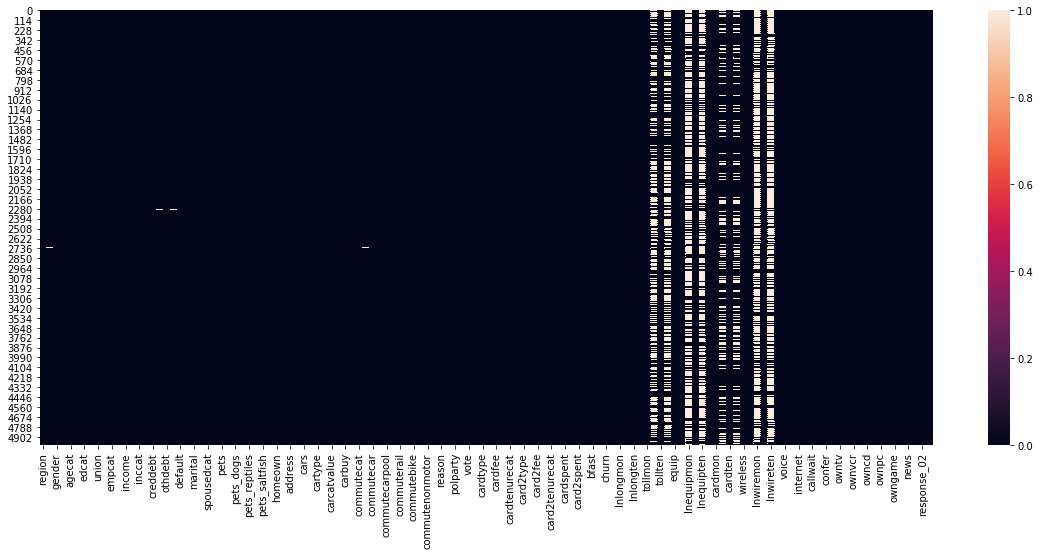

In [118]:
#Heatmap to visualize the missing values
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull())

In [119]:
sumry[sumry['NMISS']>0]['NMISS']

townsize          2
lncreddebt        1
lnothdebt         1
commutetime       2
longten           3
lnlongten         3
lntollmon      2622
lntollten      2622
lnequipmon     3296
lnequipten     3296
lncardmon      1419
cardten           2
lncardten      1422
lnwiremon      3656
lnwireten      3656
Name: NMISS, dtype: object

In [120]:
mis_col=list(sumry[sumry['NMISS']>0].index)
mis_col

['townsize',
 'lncreddebt',
 'lnothdebt',
 'commutetime',
 'longten',
 'lnlongten',
 'lntollmon',
 'lntollten',
 'lnequipmon',
 'lnequipten',
 'lncardmon',
 'cardten',
 'lncardten',
 'lnwiremon',
 'lnwireten']

In [121]:
dic={1:1 , 5:5}
data['townsize']=data.townsize.fillna(data['region'].map(dic))
data['commutetime']=data['commutetime'].fillna(25)
data['longten']=data.longten.fillna(data['longten'].mean())
data['cardten']=data.cardten.fillna(data['cardten'].mean())

In [122]:
data['lncreddebt']=np.log(data.creddebt+1)
data['lnothdebt']=np.log(data.othdebt+1)
data['lnlongten']=np.log(data.longten+1)
data['lntollmon']=np.log(data.tollmon+1)
data['lntollten']=np.log(data.tollten+1)
data['lnequipmon']=np.log(data.equipmon+1)
data['lnequipten']=np.log(data.equipten+1)
data['lncardmon']=np.log(data.cardmon+1)
data['lncardten']=np.log(data.cardten+1)
data['lnwiremon']=np.log(data.wiremon+1)
data['lnwireten']=np.log(data.wireten+1)

In [123]:
data.shape

(5000, 130)

In [124]:
data.isnull().sum().sum()

0

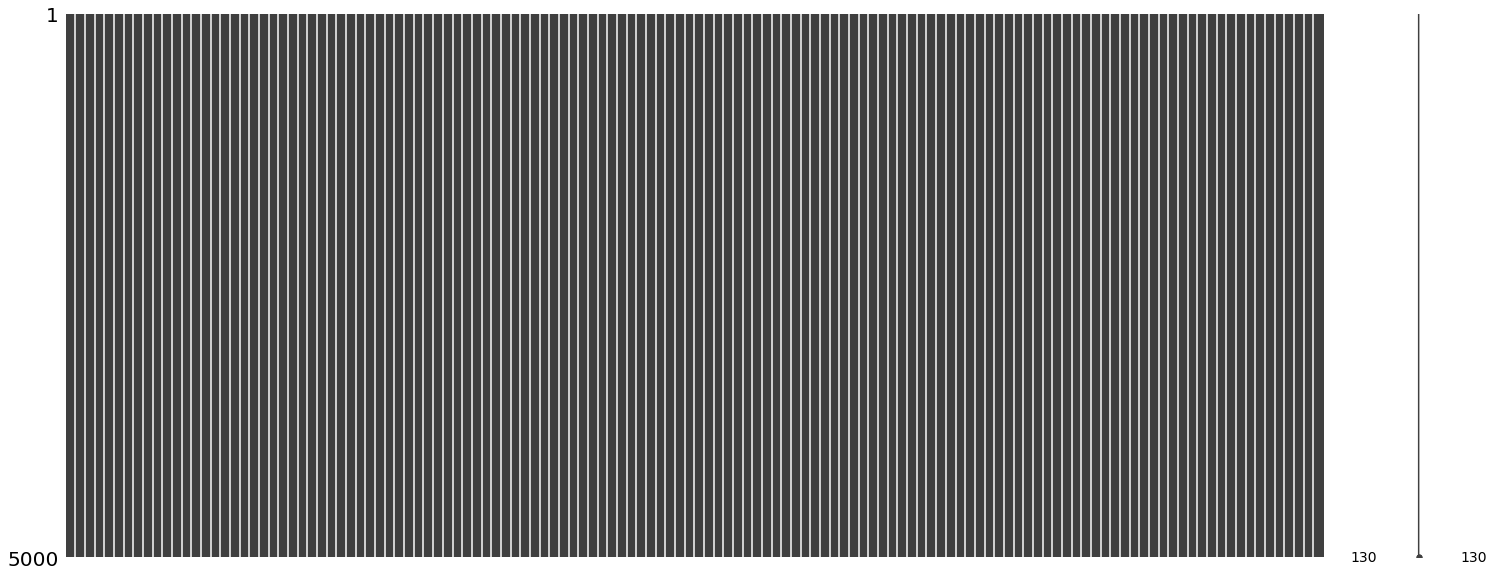

In [125]:
#Final heatmap to ensure that there is no missing value
import missingno as msno
msno.matrix(data)

###  Outlier Treatment

In [126]:
outlier_col=list(sumry[sumry['Outlier']==True].index)
outlier_col

['union',
 'employ',
 'retire',
 'income',
 'lninc',
 'debtinc',
 'creddebt',
 'lncreddebt',
 'othdebt',
 'lnothdebt',
 'default',
 'reside',
 'pets',
 'pets_cats',
 'pets_dogs',
 'pets_birds',
 'pets_reptiles',
 'pets_small',
 'pets_saltfish',
 'pets_freshfish',
 'hometype',
 'address',
 'cars',
 'carvalue',
 'carcatvalue',
 'commute',
 'commutetime',
 'commutemotorcycle',
 'commutepublic',
 'commutebike',
 'commutenonmotor',
 'telecommute',
 'reason',
 'polcontrib',
 'cardfee',
 'card2fee',
 'carditems',
 'cardspent',
 'card2items',
 'card2spent',
 'longmon',
 'lnlongmon',
 'longten',
 'lnlongten',
 'tollmon',
 'lntollmon',
 'tollten',
 'lntollten',
 'equipmon',
 'lnequipmon',
 'equipten',
 'lnequipten',
 'cardmon',
 'lncardmon',
 'cardten',
 'lncardten',
 'wiremon',
 'lnwiremon',
 'wireten',
 'lnwireten',
 'pager',
 'owntv',
 'hourstv',
 'ownvcr',
 'owndvd',
 'owncd',
 'ownpda',
 'ownfax',
 'response_01',
 'response_02',
 'response_03']

In [127]:
from matplotlib.backends.backend_pdf import PdfPages

In [128]:
#bp = PdfPages('Boxplots Of Outliers.pdf')

#for col in outlier_col:
    #fig = plt.figure(figsize=(10,6))
    #sns.boxplot(y=col , data=data)
    #plt.title(str('Box plot of ') + str(col))
    #bp.savefig(fig)
#bp.close()

In [129]:
data=data.apply(lambda x: x.clip(x.quantile(0.01),x.quantile(0.99)))

In [130]:
data.apply(lambda x: var_sum(x)).T

,NMISS%,D-type,Unique,Length,Count,NMISS,Mean,Median,Std,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max,IQR,-3Std,+3Std,Outlier
region,0,float64,5,5000,5000,0,3.0014,3,1.42176,2.0214,1,1,1,1,2,3,4,5,5,5,5,2,-1.26388,7.26668,False
townsize,0,float64,5,5000,5000,0,2.6874,3,1.42621,2.03409,1,1,1,1,1,3,4,5,5,5,5,3,-1.59124,6.96604,False
gender,0,float64,2,5000,5000,0,0.5036,1,0.500037,0.250037,0,0,0,0,0,1,1,1,1,1,1,1,-0.996511,2.00371,False
age,0,float64,62,5000,5000,0,47.0256,47,17.7703,315.785,18,18,20,23,31,47,62,72,76,79,79,31,-6.28541,100.337,False
agecat,0,float64,5,5000,5000,0,4.2388,4,1.30878,1.71292,2,2,2,2,3,4,5,6,6,6,6,2,0.312446,8.16515,False
ed,0,float64,14,5000,5000,0,14.5442,14,3.24255,10.5141,8,8,9,10,12,14,17,19,20,21,21,5,4.81654,24.2719,False
edcat,0,float64,5,5000,5000,0,2.672,2,1.21174,1.46831,1,1,1,1,2,2,4,4,5,5,5,2,-0.963215,6.30721,False
jobcat,0,float64,6,5000,5000,0,2.7528,2,1.7379,3.0203,1,1,1,1,1,2,4,6,6,6,6,3,-2.4609,7.9665,False
union,0,float64,2,5000,5000,0,0.1512,0,0.35828,0.128364,0,0,0,0,0,0,0,1,1,1,1,0,-0.923639,1.22604,True
employ,0,float64,40,5000,5000,0,9.698,7,9.58169,91.8088,0,0,0,0,2,7,15,25,31,39,39,13,-19.0471,38.4431,True


### Exploring Dependent Variable

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


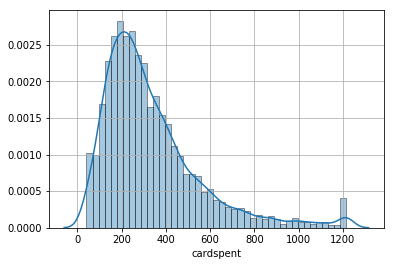

In [131]:
sns.distplot(data.cardspent)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


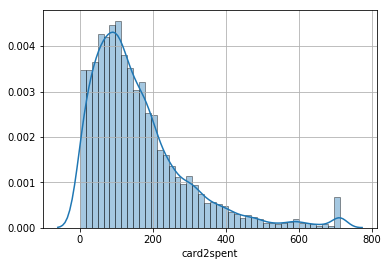

In [132]:
sns.distplot(data.card2spent)

In [133]:
data['total_spent']= data['cardspent'] + data['card2spent']
data.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [134]:
data.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,card2items,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
0,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.433987,2.0,11.1,1.200909,0.788870,2.240091,1.175601,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,3.0,2.0,5.0,4.0,0.0,3.0,5.0,1.0,6.50,1.871802,34.40,3.566712,1.0,29.0,3.401197,161.05,5.087905,1.0,29.50,3.417727,126.1,4.844974,1.0,14.25,2.724580,60.0,4.110874,0.0,0.00,0.000000,0.00,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
1,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.708050,1.0,18.6,1.222020,0.798417,1.567980,0.943120,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,1.0,3.0,0.0,4.0,2.0,5.0,2.0,1.0,1.0,39.0,0.0,8.90,2.186051,330.60,5.803929,0.0,0.0,0.000000,0.00,0.000000,1.0,54.85,4.022670,1975.0,7.588830,1.0,16.00,2.833213,610.0,6.415097,1.0,45.65,3.842673,1683.55,7.429254,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
2,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.555348,2.0,9.9,0.928620,0.656805,2.536380,1.263104,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,35.0,5.0,4.0,1.0,3.0,0.0,25.0,5.0,9.0,7.0,0.0,3.0,65.0,0.0,28.40,3.346389,1858.35,7.527982,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,23.00,3.178054,1410.0,7.252054,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
3,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,2.995732,1.0,5.7,0.033160,0.032622,1.117200,0.750094,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,2.0,3.0,2.0,4.0,0.0,5.0,2.0,17.0,1.0,1.0,1.0,36.0,0.0,6.00,1.791759,199.45,5.300565,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,21.00,3.091042,685.0,6.530878,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
4,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.135494,1.0,1.7,0.214659,0.194463,0.176341,0.162409,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,8.0,3.0,1.0,3.0,2.0,0.0,9.0,3.0,8.0,7.0,1.0,3.0,21.0,0.0

In [154]:
data.apply(lambda x: var_sum(x)).T.iloc[-1:,:]

,NMISS%,D-type,Unique,Length,Count,NMISS,Mean,Median,Std,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max,IQR,-3Std,+3Std,Outlier
total_spent,0,float64,4866,5000,5000,0,492.226,414.25,319.358,101989,40.8195,67.2663,133.788,184.033,276.283,414.25,615.562,907.605,1142.17,1645.38,1927.94,339.28,-465.848,1450.3,True


C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


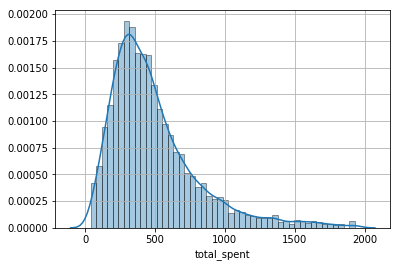

In [155]:
sns.distplot(data.total_spent)

In [156]:
#Taking log to make dependent variable normal
data['lntotal_spent']=np.log(data.total_spent+1)
data.drop(['total_spent'],axis=1,inplace=True)

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


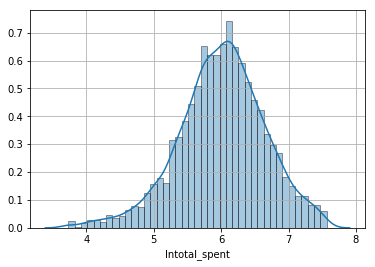

In [157]:
sns.distplot(data['lntotal_spent'])

In [158]:
data.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,carditems,card2items,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,lntotal_spent
0,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.433987,2.0,11.1,1.200909,0.788870,2.240091,1.175601,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,3.0,1.0,1.0,0.0,2.0,2.0,5.0,3.0,1.0,0.0,3.0,2.0,5.0,4.0,0.0,3.0,5.0,1.0,6.50,1.871802,34.40,3.566712,1.0,29.0,3.401197,161.05,5.087905,1.0,29.50,3.417727,126.1,4.844974,1.0,14.25,2.724580,60.0,4.110874,0.0,0.00,0.000000,0.00,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.013697
1,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.708050,1.0,18.6,1.222020,0.798417,1.567980,0.943120,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,2.0,4.0,1.0,0.0,4.0,2.0,4.0,1.0,3.0,0.0,4.0,2.0,5.0,2.0,1.0,1.0,39.0,0.0,8.90,2.186051,330.60,5.803929,0.0,0.0,0.000000,0.00,0.000000,1.0,54.85,4.022670,1975.0,7.588830,1.0,16.00,2.833213,610.0,6.415097,1.0,45.65,3.842673,1683.55,7.429254,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.363608
2,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.555348,2.0,9.9,0.928620,0.656805,2.536380,1.263104,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,2.0,1.0,4.0,0.0,35.0,5.0,4.0,1.0,3.0,0.0,25.0,5.0,9.0,7.0,0.0,3.0,65.0,0.0,28.40,3.346389,1858.35,7.527982,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,23.00,3.178054,1410.0,7.252054,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.888795
3,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,2.995732,1.0,5.7,0.033160,0.032622,1.117200,0.750094,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,2.0,1.0,4.0,0.0,5.0,2.0,3.0,2.0,4.0,0.0,5.0,2.0,17.0,1.0,1.0,1.0,36.0,0.0,6.00,1.791759,199.45,5.300565,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,21.00,3.091042,685.0,6.530878,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.887242
4,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.135494,1.0,1.7,0.214659,0.194463,0.176341,0.162409,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,4.0,2.0,1.0,0.0,8.0,3.0,1.0,3.0,2.0,0.0,9.0,3.0,8.0,7.0,1.0,3

### Deriving new KPIs

In [159]:
data['tot_card'] = data.card + data.card2
data['benif_card'] = data.card2benefit + data.cardbenefit
data['fee_card'] = data.card2fee + data.cardfee
data['card_item'] = data.carditems + data.card2items

In [160]:
data.drop(['card', 'card2', 'card2benefit', 'cardbenefit', 'card2fee', 'cardfee', 'carditems', 'card2items'], axis = 1,inplace=True)

In [161]:
data.shape

(5000, 125)

In [162]:
data.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,cardtype,cardtenure,cardtenurecat,card2type,card2tenure,card2tenurecat,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,lntotal_spent,tot_card,benif_card,fee_card,card_item
0,1.0,2.0,1.0,20.0,2.0,15.0,3.0,1.0,1.0,0.0,1.0,0.0,31.0,3.433987,2.0,11.1,1.200909,0.788870,2.240091,1.175601,1.0,1.0,0.0,-1.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,14.3,1.0,0.0,0.0,8.0,4.0,22.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.0,6.0,1.0,0.0,1.0,1.0,2.0,2.0,3.0,3.0,2.0,0.0,3.0,5.0,1.0,6.50,1.871802,34.40,3.566712,1.0,29.0,3.401197,161.05,5.087905,1.0,29.50,3.417727,126.1,4.844974,1.0,14.25,2.724580,60.0,4.110874,0.0,0.00,0.000000,0.00,0.000000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,13.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,5.013697,8.0,2.0,0.0,9.0
1,5.0,5.0,0.0,22.0,2.0,17.0,4.0,2.0,0.0,0.0,1.0,0.0,15.0,2.708050,1.0,18.6,1.222020,0.798417,1.567980,0.943120,1.0,1.0,0.0,-1.0,-1.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,6.8,1.0,0.0,0.0,1.0,1.0,29.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,9.0,4.0,1.0,0.0,0.0,4.0,4.0,2.0,1.0,4.0,2.0,1.0,1.0,39.0,0.0,8.90,2.186051,330.60,5.803929,0.0,0.0,0.000000,0.00,0.000000,1.0,54.85,4.022670,1975.0,7.588830,1.0,16.00,2.833213,610.0,6.415097,1.0,45.65,3.842673,1683.55,7.429254,1.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,18.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.363608,6.0,4.0,0.0,7.0
2,3.0,4.0,1.0,67.0,6.0,14.0,2.0,2.0,0.0,16.0,5.0,0.0,35.0,3.555348,2.0,9.9,0.928620,0.656805,2.536380,1.263104,0.0,4.0,1.0,13.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,30.0,5.0,3.0,1.0,1.0,18.8,1.0,0.0,1.0,4.0,3.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,0.0,0.0,1.0,35.0,5.0,1.0,25.0,5.0,0.0,3.0,65.0,0.0,28.40,3.346389,1858.35,7.527982,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,23.00,3.178054,1410.0,7.252054,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.888795,6.0,7.0,0.0,16.0
3,4.0,3.0,0.0,23.0,2.0,16.0,3.0,2.0,0.0,0.0,1.0,0.0,20.0,2.995732,1.0,5.7,0.033160,0.032622,1.117200,0.750094,1.0,2.0,1.0,18.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,1.0,8.7,1.0,0.0,1.0,1.0,1.0,38.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,3.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,5.0,2.0,1.0,1.0,36.0,0.0,6.00,1.791759,199.45,5.300565,0.0,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.0,0.000000,1.0,21.00,3.091042,685.0,6.530878,0.0,0.00,0.000000,0.00,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,26.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,5.887242,5.0,8.0,0.0,18.0
4,2.0,2.0,0.0,26.0,3.0,16.0,3.0,2.0,0.0,1.0,1.0,0.0,23.0,3.135494,1.0,1.7,0.214659,0.194463,0.176341,0.162409,0.0,1.0,1.0,13.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,10.6,1.0,0.0,1.0,6.0,3.0,32.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,4.0,0.0,0.0,0.0,2.0,8.0,3.0,3.0,9.0,3.0,1.0,3.0,21.0,0.0,3.05,1.115142,74.10,4.318821,1.0,16.5,2.862201,387.70,5.962808,0.0,0.00,0.000000,0.0,0.000000,1.0,17.25,2.904165,360.0

# Assumptions Of Linear Regression

### Multicolinearity

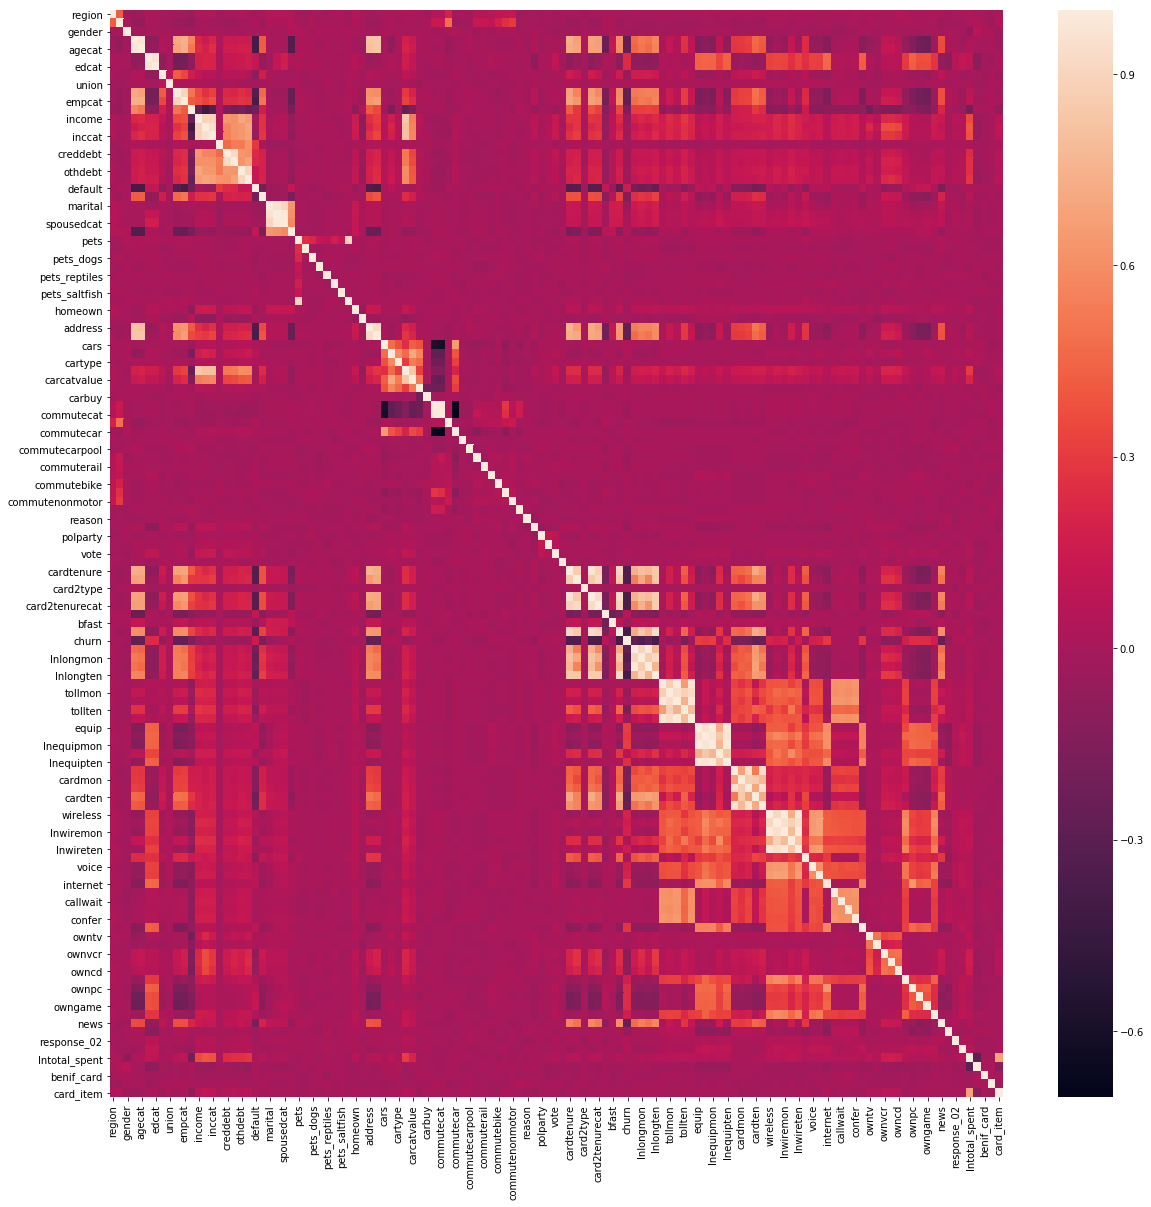

In [163]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr())

In [164]:
import statsmodels.formula.api as smf
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))

In [165]:
my_formula = "lntotal_spent~" + all_cols 
lm=smf.ols(formula=my_formula, data=data).fit()

In [166]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lntotal_spent   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     68.79
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:01:35   Log-Likelihood:                -2353.3
No. Observations:                5000   AIC:                             4957.
Df Residuals:                    4875   BIC:                             5771.
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.3207      0.143     30.239      0.000       4.041       4.601
active                0.0021      0.012      0.181      0.856      -0.021       0.025
address           -8.451e-05      0.001     -0.060      0.953      -0.003       0.003
addresscat           -0.0100      0.014     -0.736      0.462      -0.037       0.017
age                  -0.0034      0.002     -2.229      0.026      -0.006      -0.000
agecat                0.0405      0.019      2.132      0.033       0.003       0.078
benif_card           -0.0031      0.004     -0.852      0.394      -0.010       0.004
bfast                 0.0026      0.007      0.369      0.712      -0.011       0.016
callcard              0.1644      0.093      1.767      0.077      -0.018       0.347
callid                0.0153      0.017      0.915      0.360      -0.018       0.048
callwait             -0.0101      0.017     -0.607      0.544      -0.043       0.022
carbought            -0.0025      0.012     -0.200      0.841      -0.027       0.022
carbuy                0.0122      0.012      1.007      0.314      -0.012       0.036
carcatvalue           0.0011      0.015      0.073      0.942      -0.029       0.031
card2tenure          -0.0022      0.004     -0.620      0.536      -0.009       0.005
card2tenurecat        0.0118      0.017      0.677      0.498      -0.022       0.046
card2type             0.0067      0.005      1.337      0.181      -0.003       0.017
card_item             0.0933      0.001     71.231      0.000       0.091       0.096
cardmon               0.0018      0.002      0.785      0.433      -0.003       0.006
cardten             3.97e-05   2.61e-05      1.520      0.129   -1.15e-05    9.09e-05
cardtenure            0.0019      0.002      0.859      0.390      -0.002       0.006
cardtenurecat        -0.0165      0.014     -1.147      0.251      -0.045       0.012
cardtype              0.0042      0.005      0.843      0.399      -0.006       0.014
carown                0.0220      0.015      1.493      0.136      -0.007       0.051
cars                  0.0036      0.006      0.557      0.578      -0.009       0.016
cartype              -0.0145      0.011     -1.278      0.201      -0.037       0.008
carvalue             -0.0010      0.001     -1.150      0.250      -0.003       0.001
churn                 0.0279      0.015      1.849      0.064      -0.002       0.057
commute               0.0131      0.012      1.070      0.285      -0.011       0.037
commutebike          -0.0063      0.017     -0.363      0.716      -0.041       0.028
commutebus           -0.0018      0.013     -0.140      0.889      -0.027       0.023
commutecar            0.0048      0.019      0.250      0.803      -0.033       0.042
commutecarpool        0.0042      0.013      0.329      0.742      -0.021

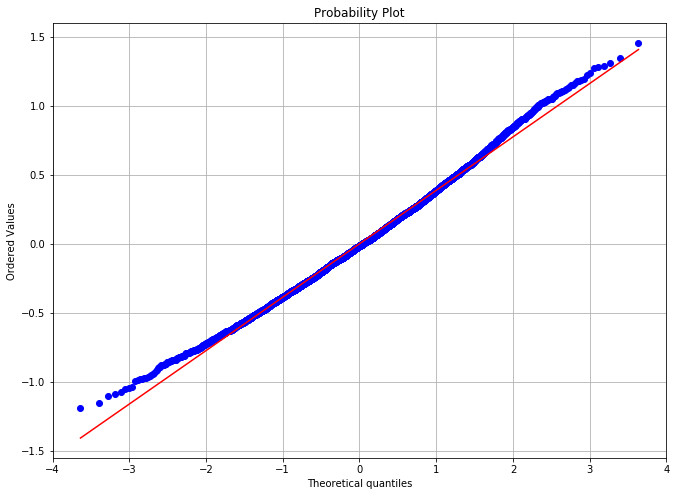

In [167]:
#Q-Q Plot
from scipy import stats
import pylab
plt.figure(figsize=(11,8))
stats.probplot(lm.resid,dist="norm",plot=pylab)
pylab.show()

C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


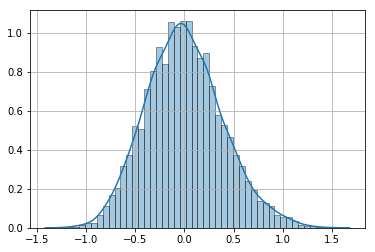

In [168]:
sns.distplot(lm.resid)

### Variance Inflation Factor

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
y,x = dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
66,7444.945643,lnequipmon
49,3573.041364,equip
74,2511.051254,lnwiremon
72,1454.824110,lntollmon
122,1066.186529,wireless
50,683.000697,equipmon
0,663.169405,Intercept
114,482.036597,tollfree
123,240.401874,wiremon
73,189.350664,lntollten


## Variable Reduction Using VIF

In [170]:
data= data.drop('equip',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
73,2355.070548,lnwiremon
71,1453.561428,lntollmon
121,1019.529238,wireless
0,662.102441,Intercept
113,481.236768,tollfree
65,261.587244,lnequipmon
122,214.030045,wiremon
72,189.349997,lntollten
114,188.963108,tollmon
74,185.533684,lnwireten


In [171]:
data= data.drop('lntollmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
72,2321.169126,lnwiremon
120,1013.226642,wireless
0,661.925308,Intercept
65,261.483143,lnequipmon
121,210.524338,wiremon
73,181.760866,lnwireten
66,172.399553,lnequipten
74,163.256942,longmon
62,139.620502,lncardmon
75,135.841144,longten


In [172]:
data= data.drop('wireless',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,661.925292,Intercept
65,261.321718,lnequipmon
72,229.819650,lnwiremon
73,174.601142,lnwireten
66,172.399545,lnequipten
74,163.251446,longmon
62,139.590903,lncardmon
75,135.840881,longten
108,131.155530,spoused
71,117.777946,lntollten


In [173]:
data= data.drop('lnequipmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,656.855299,Intercept
71,194.494579,lnwiremon
73,163.217135,longmon
72,153.277348,lnwireten
62,139.589196,lncardmon
74,135.799830,longten
107,131.147745,spoused
70,117.717483,lntollten
89,109.391393,pets
93,90.039490,pets_freshfish


In [174]:
data= data.drop('lnwiremon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,656.564720,Intercept
72,163.180860,longmon
62,138.993652,lncardmon
73,135.766934,longten
106,131.099918,spoused
88,109.391365,pets
70,107.599295,lntollten
92,90.039490,pets_freshfish
110,77.761902,tollfree
63,74.401183,lncardten


In [175]:
data= data.drop('longmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,647.896131,Intercept
62,138.796542,lncardmon
105,131.078334,spoused
87,109.381506,pets
70,107.138739,lntollten
91,90.030459,pets_freshfish
109,77.401518,tollfree
63,74.393621,lncardten
106,58.792350,spousedcat
8,56.558223,callcard


In [176]:
data= data.drop('lncardmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,645.990699,Intercept
104,131.043862,spoused
86,109.351938,pets
69,104.925647,lntollten
90,90.005744,pets_freshfish
108,75.934876,tollfree
105,58.782108,spousedcat
62,57.510348,lncardten
33,40.512313,commutecat
28,36.603923,commute


In [177]:
data= data.drop('spoused',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,644.575304,Intercept
86,109.350854,pets
69,104.924659,lntollten
90,90.004863,pets_freshfish
107,75.929595,tollfree
62,57.497302,lncardten
33,40.502639,commutecat
28,36.592381,commute
8,34.985482,callcard
67,33.831032,lnlongten


In [178]:
data= data.drop('pets',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,644.575304,Intercept
69,104.898866,lntollten
106,75.923597,tollfree
62,57.440584,lncardten
33,40.500142,commutecat
28,36.590843,commute
8,34.959648,callcard
67,33.829965,lnlongten
14,33.799093,card2tenure
49,30.960187,equipmon


In [179]:
data= data.drop('lntollten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,632.785131,Intercept
62,51.013204,lncardten
33,40.499700,commutecat
28,36.590811,commute
14,33.723852,card2tenure
8,31.255494,callcard
49,30.950181,equipmon
67,30.829592,lnlongten
113,27.234324,wiremon
65,27.035186,lninc


In [180]:
data= data.drop('lncardten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,625.100614,Intercept
33,40.492721,commutecat
28,36.580832,commute
14,33.712818,card2tenure
49,30.941887,equipmon
66,28.901721,lnlongten
112,27.229758,wiremon
64,27.034952,lninc
63,24.972268,lnequipten
4,24.268562,age


In [181]:
data= data.drop('commutecat',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,609.389003,Intercept
14,33.706849,card2tenure
48,30.931227,equipmon
65,28.901627,lnlongten
111,27.224144,wiremon
63,27.032931,lninc
62,24.969926,lnequipten
4,24.263489,age
20,23.737818,cardtenure
102,23.404047,tenure


In [182]:
data= data.drop('card2tenure',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,608.842674,Intercept
47,30.931203,equipmon
64,28.377740,lnlongten
110,27.224066,wiremon
62,27.024643,lninc
61,24.969498,lnequipten
4,24.173570,age
101,22.544776,tenure
103,22.439988,tollmon
5,19.999254,agecat


In [183]:
data= data.drop('equipmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,606.861522,Intercept
63,28.013843,lnlongten
61,27.022715,lninc
4,24.172541,age
100,22.532337,tenure
102,22.125477,tollmon
5,19.996037,agecat
109,19.939617,wiremon
43,16.463292,ed
44,15.566590,edcat


In [184]:
data= data.drop('lnlongten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,589.835562,Intercept
61,26.832130,lninc
4,24.095901,age
101,22.008538,tollmon
5,19.971783,agecat
108,19.911720,wiremon
43,16.461788,ed
44,15.566001,edcat
63,15.362349,lnothdebt
54,13.868218,inccat


In [185]:
data= data.drop('lninc',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,380.055662,Intercept
4,24.065189,age
100,21.971729,tollmon
5,19.922599,agecat
107,19.906416,wiremon
43,16.439406,ed
44,15.561417,edcat
19,13.766771,cardtenure
98,13.595061,tenure
101,13.471200,tollten


In [186]:
data= data.drop('age',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,379.354427,Intercept
99,21.971729,tollmon
106,19.906294,wiremon
42,16.433418,ed
43,15.558652,edcat
18,13.674449,cardtenure
97,13.592502,tenure
100,13.471158,tollten
61,13.315417,lnothdebt
17,12.712351,cardten


In [187]:
data= data.drop('tollmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,379.324233,Intercept
105,19.145934,wiremon
42,16.433404,ed
43,15.558313,edcat
18,13.666949,cardtenure
97,13.334523,tenure
61,13.314710,lnothdebt
17,12.462800,cardten
24,11.999995,carvalue
54,11.751954,income


In [188]:
data= data.drop('wiremon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,379.285378,Intercept
42,16.431269,ed
43,15.555973,edcat
18,13.655012,cardtenure
61,13.307013,lnothdebt
97,13.278403,tenure
17,12.338653,cardten
24,11.999664,carvalue
54,11.734570,income
58,10.852717,lncreddebt


In [189]:
data= data.drop('ed',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,281.066726,Intercept
18,13.654361,cardtenure
60,13.306478,lnothdebt
96,13.278045,tenure
17,12.338517,cardten
24,11.998218,carvalue
53,11.731346,income
57,10.852672,lncreddebt
3,10.353731,addresscat
13,10.324595,card2tenurecat


In [190]:
data= data.drop('cardtenure',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,279.668782,Intercept
59,13.305090,lnothdebt
95,12.745776,tenure
17,12.071534,cardten
23,11.998179,carvalue
52,11.728201,income
56,10.849476,lncreddebt
3,10.289987,addresscat
13,10.160819,card2tenurecat
16,9.342323,cardmon


In [191]:
data= data.drop('lnothdebt',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,278.331959,Intercept
94,12.745684,tenure
17,12.071409,cardten
23,11.989372,carvalue
52,11.575261,income
56,10.801742,lncreddebt
3,10.286067,addresscat
13,10.160801,card2tenurecat
16,9.342270,cardmon
2,8.954504,address


In [192]:
data= data.drop('tenure',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,278.192288,Intercept
23,11.987414,carvalue
52,11.574276,income
56,10.800903,lncreddebt
17,10.416229,cardten
3,10.272502,addresscat
13,8.981838,card2tenurecat
2,8.928079,address
12,8.836075,carcatvalue
16,8.445585,cardmon


In [193]:
data= data.drop('carvalue',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,277.570521,Intercept
55,10.800893,lncreddebt
17,10.415214,cardten
3,10.272501,addresscat
13,8.962321,card2tenurecat
2,8.926956,address
51,8.491144,income
16,8.442988,cardmon
36,8.414933,creddebt
18,8.121067,cardtenurecat


In [194]:
data= data.drop('lncreddebt',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,277.187739,Intercept
17,10.413043,cardten
3,10.270634,addresscat
13,8.960797,card2tenurecat
2,8.926294,address
51,8.464263,income
16,8.438717,cardmon
18,8.116086,cardtenurecat
42,8.100773,employ
41,7.885715,empcat


In [195]:
data= data.drop('cardten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,276.780878,Intercept
3,10.264357,addresscat
2,8.896537,address
13,8.743010,card2tenurecat
50,8.463405,income
17,8.110887,cardtenurecat
41,8.081833,employ
40,7.879843,empcat
58,7.757662,marital
49,7.039198,inccat


In [196]:
data= data.drop('addresscat',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,275.315708,Intercept
12,8.737735,card2tenurecat
49,8.458892,income
40,8.020878,employ
16,7.996531,cardtenurecat
39,7.840942,empcat
57,7.753303,marital
88,6.989988,spousedcat
48,6.989356,inccat
97,6.861077,wireten


In [197]:
data.shape

(5000, 98)

In [198]:
data= data.drop('card2tenurecat',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,275.153859,Intercept
48,8.452562,income
39,8.019603,employ
38,7.822954,empcat
56,7.752922,marital
87,6.989567,spousedcat
47,6.989276,inccat
96,6.860735,wireten
40,6.731620,equipten
52,6.451675,lnequipten


In [199]:
data= data.drop('income',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,274.818511,Intercept
39,7.792568,employ
38,7.753200,empcat
55,7.748597,marital
86,6.982336,spousedcat
95,6.860248,wireten
40,6.730516,equipten
51,6.449870,lnequipten
53,6.118674,lnwireten
52,5.743519,lnlongmon


In [200]:
data= data.drop('employ',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,269.167260,Intercept
54,7.743413,marital
85,6.982157,spousedcat
94,6.860191,wireten
39,6.707787,equipten
50,6.443210,lnequipten
52,6.118443,lnwireten
51,5.738945,lnlongmon
3,5.368239,agecat
46,4.763039,inccat


In [201]:
data= data.drop('marital',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,266.710918,Intercept
93,6.858824,wireten
39,6.701575,equipten
50,6.436129,lnequipten
52,6.117717,lnwireten
51,5.738447,lnlongmon
3,5.363573,agecat
46,4.762918,inccat
11,4.642043,carcatvalue
53,4.618256,longten


In [202]:
data= data.drop('wireten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,266.181390,Intercept
51,5.738332,lnlongmon
50,5.420160,lnequipten
3,5.361945,agecat
39,4.827881,equipten
46,4.762917,inccat
11,4.640715,carcatvalue
53,4.618155,longten
38,4.113908,empcat
15,3.705091,cardtenurecat


In [203]:
data= data.drop('lnlongmon',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,251.928863,Intercept
50,5.418872,lnequipten
3,5.349577,agecat
39,4.826033,equipten
46,4.755960,inccat
11,4.638706,carcatvalue
38,4.113698,empcat
2,3.532489,address
15,3.230104,cardtenurecat
55,3.167005,othdebt


In [204]:
data= data.drop('lnequipten',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,251.928646,Intercept
3,5.348325,agecat
46,4.747989,inccat
11,4.638702,carcatvalue
38,4.110596,empcat
2,3.532275,address
15,3.216548,cardtenurecat
54,3.164450,othdebt
84,3.133712,tollfree
17,2.988133,carown


In [205]:
data= data.drop('agecat',axis=1)
all_cols= '+'.join(data.columns.difference(['lntotal_spent']))
my_formula='lntotal_spent~' + all_cols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

y,x= dmatrices(my_formula, data, return_type='dataframe')

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['features']=x.columns
vif.sort_values(by='VIF', ascending=False)

,VIF,features
0,227.812137,Intercept
45,4.741517,inccat
10,4.635556,carcatvalue
37,3.684368,empcat
53,3.163920,othdebt
83,3.131182,tollfree
16,2.983891,carown
14,2.974222,cardtenurecat
84,2.847156,tollten
2,2.670947,address


In [206]:
data.shape

(5000, 90)

In [207]:
lm=smf.ols(formula=my_formula, data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lntotal_spent   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     93.34
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:04:49   Log-Likelihood:                -2406.5
No. Observations:                5000   AIC:                             4993.
Df Residuals:                    4910   BIC:                             5579.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.7868      0.084     56.756      0.000       4.621       4.952
active                0.0025      0.012      0.208      0.835      -0.021       0.026
address              -0.0011      0.001     -1.527      0.127      -0.003       0.000
benif_card           -0.0033      0.004     -0.907      0.364      -0.010       0.004
bfast                 0.0041      0.007      0.583      0.560      -0.010       0.018
callcard             -0.0441      0.019     -2.355      0.019      -0.081      -0.007
callid                0.0169      0.017      1.011      0.312      -0.016       0.050
callwait             -0.0115      0.017     -0.692      0.489      -0.044       0.021
carbought            -0.0062      0.012     -0.500      0.617      -0.031       0.018
carbuy                0.0090      0.012      0.739      0.460      -0.015       0.033
carcatvalue          -0.0014      0.011     -0.124      0.901      -0.023       0.020
card2type             0.0075      0.005      1.493      0.136      -0.002       0.017
card_item             0.0939      0.001     71.447      0.000       0.091       0.096
cardmon               0.0005      0.001      0.938      0.348      -0.001       0.002
cardtenurecat        -0.0043      0.007     -0.611      0.541      -0.018       0.010
cardtype              0.0033      0.005      0.660      0.509      -0.007       0.013
carown                0.0260      0.015      1.761      0.078      -0.003       0.055
cars                  0.0023      0.006      0.355      0.723      -0.010       0.015
cartype              -0.0204      0.011     -1.788      0.074      -0.043       0.002
churn                 0.0290      0.015      1.957      0.050   -5.61e-05       0.058
commute               0.0024      0.003      0.791      0.429      -0.004       0.008
commutebike          -0.0063      0.017     -0.361      0.718      -0.041       0.028
commutebus           -0.0035      0.012     -0.295      0.768      -0.026       0.019
commutecar            0.0065      0.018      0.352      0.725      -0.030       0.043
commutecarpool        0.0040      0.013      0.316      0.752      -0.021       0.029
commutemotorcycle     0.0028      0.019      0.151      0.880      -0.034       0.039
commutenonmotor      -0.0398      0.025     -1.581      0.114      -0.089       0.010
commutepublic         0.0007      0.019      0.037      0.970      -0.037       0.039
commuterail          -0.0176      0.013     -1.375      0.169      -0.043       0.007
commutetime        2.448e-05      0.001      0.022      0.983      -0.002       0.002
commutewalk          -0.0276      0.013     -2.203      0.028      -0.052      -0.003
confer                0.0010      0.017      0.062      0.951      -0.032       0.034
creddebt              0.0108      0.004      3.031      0.002       0.004

In [208]:
feature_col=data.columns.difference(['lntotal_spent'])
feature_col

Index(['active', 'address', 'benif_card', 'bfast', 'callcard', 'callid',
       'callwait', 'carbought', 'carbuy', 'carcatvalue', 'card2type',
       'card_item', 'cardmon', 'cardtenurecat', 'cardtype', 'carown', 'cars',
       'cartype', 'churn', 'commute', 'commutebike', 'commutebus',
       'commutecar', 'commutecarpool', 'commutemotorcycle', 'commutenonmotor',
       'commutepublic', 'commuterail', 'commutetime', 'commutewalk', 'confer',
       'creddebt', 'debtinc', 'default', 'ebill', 'edcat', 'empcat',
       'equipten', 'fee_card', 'forward', 'gender', 'homeown', 'hometype',
       'hourstv', 'inccat', 'internet', 'jobcat', 'jobsat', 'lnwireten',
       'longten', 'multline', 'news', 'othdebt', 'owncd', 'owndvd', 'ownfax',
       'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager',
       'pets_birds', 'pets_cats', 'pets_dogs', 'pets_freshfish',
       'pets_reptiles', 'pets_saltfish', 'pets_small', 'polcontrib',
       'polparty', 'polview', 'reason', 'region',

## Splitting the data in to train and test datasets

In [209]:
from sklearn.model_selection import train_test_split as tts
train_x, test_x, train_y, test_y = tts(data[feature_col], data['lntotal_spent'], test_size=0.3, random_state=110)

In [210]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3500, 89)
(3500,)
(1500, 89)
(1500,)


### Feature Selection on the basis of P_values

In [211]:
from sklearn.feature_selection import f_regression
 
f_values,p_values = f_regression(train_x,train_y)

In [212]:
feat_slec= pd.DataFrame()
feat_slec['F_values']= f_values
feat_slec['P_values']=p_values.round(3)
feat_slec['Feature']= train_x.columns
feat_slec.sort_values(by='P_values', ascending=False)

,F_values,P_values,Feature
0,0.000083,0.993,active
85,0.000088,0.993,townsize
71,0.001059,0.974,polparty
46,0.005642,0.940,jobcat
69,0.037461,0.847,pets_small
28,0.045626,0.831,commutetime
23,0.049976,0.823,commutecarpool
81,0.064102,0.800,telecommute
64,0.064568,0.799,pets_cats
65,0.074388,0.785,pets_dogs


In [213]:
slec_col= feat_slec[feat_slec['P_values']<0.05]
slec_col.head()

,F_values,P_values,Feature
1,7.819855,0.005,address
5,8.778132,0.003,callid
6,8.601696,0.003,callwait
9,142.287945,0.000,carcatvalue
11,2898.537843,0.000,card_item


In [214]:
slec_col.shape

(44, 3)

In [215]:
feature_columns= list(slec_col['Feature'])
feature_columns

['address',
 'callid',
 'callwait',
 'carcatvalue',
 'card_item',
 'cardtenurecat',
 'carown',
 'confer',
 'creddebt',
 'ebill',
 'edcat',
 'empcat',
 'equipten',
 'forward',
 'gender',
 'homeown',
 'hourstv',
 'inccat',
 'internet',
 'jobsat',
 'lnwireten',
 'longten',
 'multline',
 'othdebt',
 'owncd',
 'owndvd',
 'ownfax',
 'owngame',
 'ownipod',
 'ownpc',
 'ownpda',
 'owntv',
 'ownvcr',
 'pager',
 'pets_reptiles',
 'region',
 'response_03',
 'retire',
 'spousedcat',
 'tollfree',
 'tollten',
 'tot_card',
 'voice',
 'vote']

## Prepairing the final dataset for building predictive model

In [216]:
train_x, test_x, train_y, test_y= tts(data[feature_columns], data['lntotal_spent'], test_size=0.2, random_state= 110)

In [217]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4000, 44)
(4000,)
(1000, 44)
(1000,)


In [218]:
all_col= '+'.join(train_x.columns)
myform= 'lntotal_spent~' + all_col

lm=smf.ols(myform, data= pd.concat([train_x,train_y], axis=1)).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lntotal_spent   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     145.0
Date:                Thu, 17 Jan 2019   Prob (F-statistic):               0.00
Time:                        11:04:51   Log-Likelihood:                -1956.7
No. Observations:                4000   AIC:                             4003.
Df Residuals:                    3955   BIC:                             4287.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.7981      0.069     69.288      0.000       4.662       4.934
address          -0.0008      0.001     -1.010      0.313      -0.002       0.001
callid            0.0137      0.019      0.721      0.471      -0.023       0.051
callwait         -0.0049      0.019     -0.266      0.790      -0.041       0.031
carcatvalue      -0.0020      0.011     -0.180      0.857      -0.024       0.020
card_item         0.0935      0.001     63.438      0.000       0.091       0.096
cardtenurecat    -0.0108      0.008     -1.431      0.152      -0.026       0.004
carown            0.0173      0.015      1.119      0.263      -0.013       0.048
confer           -0.0113      0.019     -0.595      0.552      -0.048       0.026
creddebt          0.0070      0.004      1.931      0.054      -0.000       0.014
ebill             0.0127      0.018      0.714      0.475      -0.022       0.048
edcat            -0.0135      0.007     -2.006      0.045      -0.027      -0.000
empcat            0.0099      0.008      1.280      0.201      -0.005       0.025
equipten       1.455e-05   9.47e-06      1.537      0.124   -4.01e-06    3.31e-05
forward          -0.0131      0.018     -0.713      0.476      -0.049       0.023
gender           -0.0631      0.013     -4.995      0.000      -0.088      -0.038
homeown          -0.0015      0.014     -0.108      0.914      -0.028       0.025
hourstv          -0.0013      0.001     -0.921      0.357      -0.004       0.001
inccat            0.1390      0.010     13.976      0.000       0.120       0.159
internet          0.0012      0.007      0.188      0.851      -0.012       0.014
jobsat           -0.0060      0.005     -1.117      0.264      -0.017       0.005
lnwireten         0.0034      0.003      1.043      0.297      -0.003       0.010
longten       -5.433e-06   9.95e-06     -0.546      0.585   -2.49e-05    1.41e-05
multline         -0.0370      0.016     -2.306      0.021      -0.068      -0.006
othdebt           0.0043      0.002      1.989      0.047    6.28e-05       0.009
owncd             0.0289      0.031      0.928      0.354      -0.032       0.090
owndvd            0.0491      0.028      1.759      0.079      -0.006       0.104
ownfax            0.0009      0.021      0.045      0.964      -0.040       0.042
owngame          -0.0067      0.015     -0.433      0.665      -0.037       0.024
ownipod          -0.0054      0.015     -0.355      0.723      -0.035       0.024
ownpc             0.0274      0.018      1.557      0.120      -0.007       0.062
ownpda            0.0430      0.020      2.139      0.032       0.004       0.082
owntv             0.0111      0.061      0.181      0.856      -0.109       0.131
ownvcr            0.0284      0.028      1.005      0.315      -0.027       0.084
pager            -0.0189      0.022     -0.876   

In [219]:
f_values,p_values= f_regression(train_x,train_y)

feat_slec= pd.DataFrame()
feat_slec['F_values']= f_values
feat_slec['P_values']=p_values.round(3)
feat_slec['Feature']= train_x.columns
feat_slec.sort_values(by='P_values', ascending=False)

,F_values,P_values,Feature
21,4.308844,0.038,longten
9,4.688208,0.030,ebill
34,5.828565,0.016,pets_reptiles
0,6.783962,0.009,address
16,6.961119,0.008,hourstv
28,7.329196,0.007,ownipod
35,7.725132,0.005,region
42,8.401386,0.004,voice
38,8.167504,0.004,spousedcat
29,9.064503,0.003,ownpc


## Building the final model

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

reg= LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [221]:
reg.coef_

array([-8.01162973e-04,  1.36718883e-02, -4.92858705e-03, -2.01635403e-03,
        9.34635238e-02, -1.07694532e-02,  1.72776970e-02, -1.12638815e-02,
        6.95895013e-03,  1.26952075e-02, -1.34556291e-02,  9.86435594e-03,
        1.45451679e-05, -1.30950365e-02, -6.31262145e-02, -1.45675954e-03,
       -1.31842570e-03,  1.39009267e-01,  1.24124668e-03, -6.01661509e-03,
        3.43395928e-03, -5.43341385e-06, -3.69724816e-02,  4.34715657e-03,
        2.88888763e-02,  4.91482720e-02,  9.27795941e-04, -6.69808506e-03,
       -5.39538411e-03,  2.74374435e-02,  4.29969554e-02,  1.10537860e-02,
        2.84243569e-02, -1.89208004e-02,  6.56336711e-02,  8.58943593e-03,
        4.78184150e-02, -6.32624565e-02,  5.78280987e-03, -1.72471582e-03,
       -5.41690475e-07, -1.00119080e-01, -2.26978147e-02,  1.13095368e-02])

## calculating matrix scores and compairing training model with testing model

In [222]:
y_pred_t= reg.predict(train_x)
mse= metrics.mean_squared_error(train_y, y_pred_t)
rmse= np.sqrt(mse)
r2= metrics.r2_score(train_y, y_pred_t)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 SCORE:', r2)

MSE: 0.15574912365623458
RMSE: 0.39465063493707264
R2 SCORE: 0.6172411285545293


In [223]:
y_pred= reg.predict(test_x)
mse= metrics.mean_squared_error(test_y, y_pred)
rmse= np.sqrt(mse)
r2= metrics.r2_score(test_y, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2 SCORE:', r2)

MSE: 0.15341698477748125
RMSE: 0.3916848028421338
R2 SCORE: 0.6476942776709396


Hence, this small variance in R2 score assures that there in no underfitting or overfittig

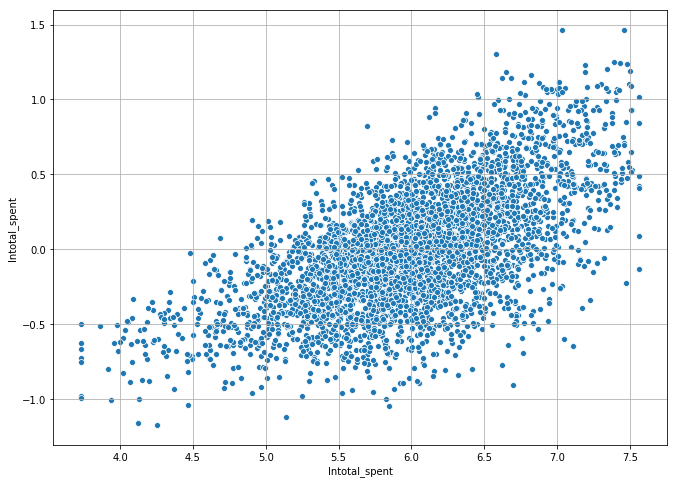

In [230]:
#Residuals plot- plot has no issue as residuals are randomly scattered 
resid= train_y - y_pred_t

plt.figure(figsize=(11,8))
sns.scatterplot(train_y,resid)

## Interpreting the Estimators and their coefficients 

In [224]:
cof=list(reg.coef_.round(5))

cof_df= pd.DataFrame()
cof_df['Features']= train_x.columns
cof_df['Coefficients']= cof
cof_df.loc[-1]= ['intercept', reg.intercept_]
cof_df.index= cof_df.index + 1
cof_df= cof_df.sort_index()
cof_df

,Features,Coefficients
0,intercept,4.798077
1,address,-0.000800
2,callid,0.013670
3,callwait,-0.004930
4,carcatvalue,-0.002020
5,card_item,0.093460
6,cardtenurecat,-0.010770
7,carown,0.017280
8,confer,-0.011260
9,creddebt,0.006960


In [225]:
pred= pd.DataFrame()
pred['Actual']=test_y
pred['Predicted']=y_pred
pred.head()

,Actual,Predicted
3452,6.116907,6.350064
4814,6.220133,6.272934
1955,4.827674,5.400721
745,5.986276,5.892630
3070,6.101238,5.574746


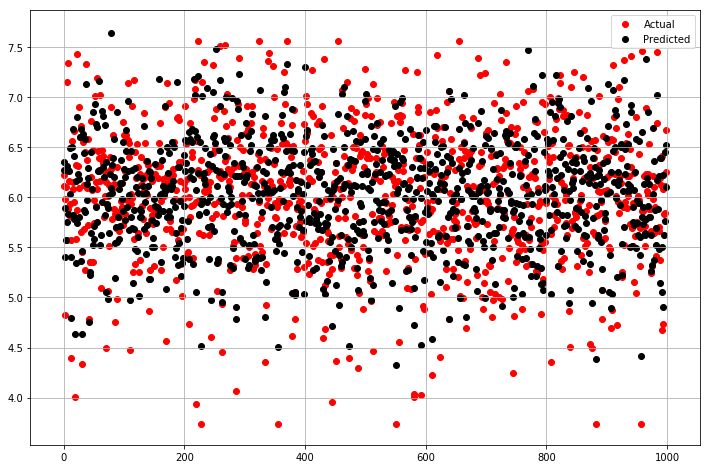

In [226]:
#Final scatter plot showing actual and predicted values
plt.figure(figsize=(12,8))
plt.scatter(range(0, len(pred['Actual'])), pred['Actual'], c='red', label='Actual')
plt.scatter(range(0, len(pred['Predicted'])), pred['Predicted'], c='black', label='Predicted')
plt.legend(frameon=True)

# Now compairing our final model with other models using K-fold

In [248]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [252]:
sc1= cross_val_score(LinearRegression(), train_x, train_y, scoring='r2', cv=10)
np.mean(sc1)

0.6075106193287676

In [253]:
sc2= cross_val_score(Lasso(), train_x, train_y, scoring='r2', cv=10)
np.mean(sc2)

0.33221524606307284

In [254]:
sc3= cross_val_score(ElasticNet(), train_x, train_y, scoring='r2', cv=10)
np.mean(sc3)

0.4383849193576502

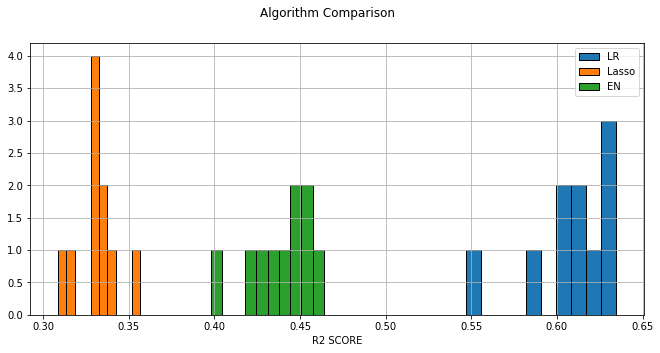

In [294]:
fig = plt.figure(figsize=(11,5))
fig.suptitle('Algorithm Comparison')
plt.hist(sc1, label='LR')
plt.hist(sc2, label='Lasso')
plt.hist(sc3, label='EN')
plt.xlabel('R2 SCORE')
plt.legend(frameon=True)
plt.show()